# Questão 2

<p align="center">

<img src="img/q2.png">

</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Item 3 - Calcule numericamente a variação total entre π(t) e a distribuição estacionária

In [2]:
# Função para gerar a matriz de transição e a distribuição estacionária em um grafo de anel
def generate_anel():
    P_anel = np.zeros((100,100))

    stat_distribution = np.zeros(100)

    for i in range(100):
        P_anel[i][i] = 1/2
        stat_distribution[i] = 1/100
        if i == 0:
            P_anel[i][99] = 1/4
            P_anel[i][i + 1] = 1/4
        elif i == 99:
            P_anel[i][i - 1] = 1/4
            P_anel[i][0] = 1/4
        else:
            P_anel[i][i - 1] = 1/4
            P_anel[i][i + 1] = 1/4

    return P_anel, stat_distribution

P_anel, dist_anel = generate_anel()

In [3]:
# Função para gerar a matriz de transição e a distribuição estacionária em um grafo árvore binária

def generate_arvore():
    P_arvore = np.zeros((127,127))

    stat_distribution = np.zeros(127)

    for i in range(1, 128):
        corr_i = i - 1
        P_arvore[corr_i][corr_i] = 1/2
        if i == 1:
            P_arvore[corr_i][corr_i + 1] = 1/4
            P_arvore[corr_i][corr_i + 2] = 1/4

            stat_distribution[corr_i] = 1/126
        elif i <= 2**6 - 1:
            P_arvore[corr_i][int(i/2) - 1] = 1/6
            P_arvore[corr_i][2*i - 1] = 1/6
            P_arvore[corr_i][2*i] = 1/6

            stat_distribution[corr_i] = 1/84
        else:
            P_arvore[corr_i][int(i/2) - 1] = 1/2

            stat_distribution[corr_i] = 1/252

    return P_arvore, stat_distribution

P_arvore, dist_arvore = generate_arvore()

In [4]:
# Função para gerar a matriz de transição e a distribuição estacionária em um reticulado de duas dimensões
def generate_reticulado():
    P_reticulado = np.zeros((100,100))

    stat_distribution = np.zeros(100)


    for i in range(100):
        P_reticulado[i][i] = 1/2
        if i == 0:
            P_reticulado[i][i + 1] = 1/4
            P_reticulado[i][i + 10] = 1/4
            
            stat_distribution[i] = 1/180
        elif i == 9:
            P_reticulado[i][i - 1] = 1/4
            P_reticulado[i][i + 10] = 1/4

            stat_distribution[i] = 1/180
        elif i == 90:
            P_reticulado[i][i + 1] = 1/4
            P_reticulado[i][i - 10] = 1/4

            stat_distribution[i] = 1/180
        elif i == 99:
            P_reticulado[i][i - 1] = 1/4
            P_reticulado[i][i - 10] = 1/4

            stat_distribution[i] = 1/180
        elif i < 10:
            P_reticulado[i][i - 1] = 1/6
            P_reticulado[i][i + 1] = 1/6
            P_reticulado[i][i + 10] = 1/6

            stat_distribution[i] = 1/120
        elif i > 90:
            P_reticulado[i][i - 1] = 1/6
            P_reticulado[i][i + 1] = 1/6
            P_reticulado[i][i - 10] = 1/6

            stat_distribution[i] = 1/120
        elif i % 10 == 0:
            P_reticulado[i][i + 1] = 1/6
            P_reticulado[i][i + 10] = 1/6
            P_reticulado[i][i - 10] = 1/6

            stat_distribution[i] = 1/120
        elif i % 10 == 9:
            P_reticulado[i][i - 1] = 1/6
            P_reticulado[i][i + 10] = 1/6
            P_reticulado[i][i - 10] = 1/6

            stat_distribution[i] = 1/120
        else:
            P_reticulado[i][i - 1] = 1/8
            P_reticulado[i][i + 1] = 1/8
            P_reticulado[i][i + 10] = 1/8
            P_reticulado[i][i - 10] = 1/8

            stat_distribution[i] = 1/90
    
    return P_reticulado, stat_distribution

P_reticulado, dist_reticulado = generate_reticulado()

In [5]:
# Distância de variação total
def total_variation_distance(p, q):
    return np.sum(np.abs(p - q))/2


# Função para calcular a distância de variação total entre a distribuição estacionária e a distribuição inicial
def calculate_dist(P, dist, t):
    # Distribuição inicial com probabilidade 1 no estado 0
    initial_dist = np.zeros(dist.shape)
    initial_dist[0] = 1

    distance_list = np.array([])
    curr_dist = initial_dist

    for i in range(t):
        curr_dist = curr_dist @ P
        distance_list = np.append(distance_list, total_variation_distance(curr_dist, dist))

    return distance_list


d_anel = calculate_dist(P_anel, dist_anel, 10**3)
d_arvore = calculate_dist(P_arvore, dist_arvore, 10**3)
d_reticulado = calculate_dist(P_reticulado, dist_reticulado, 10**3)

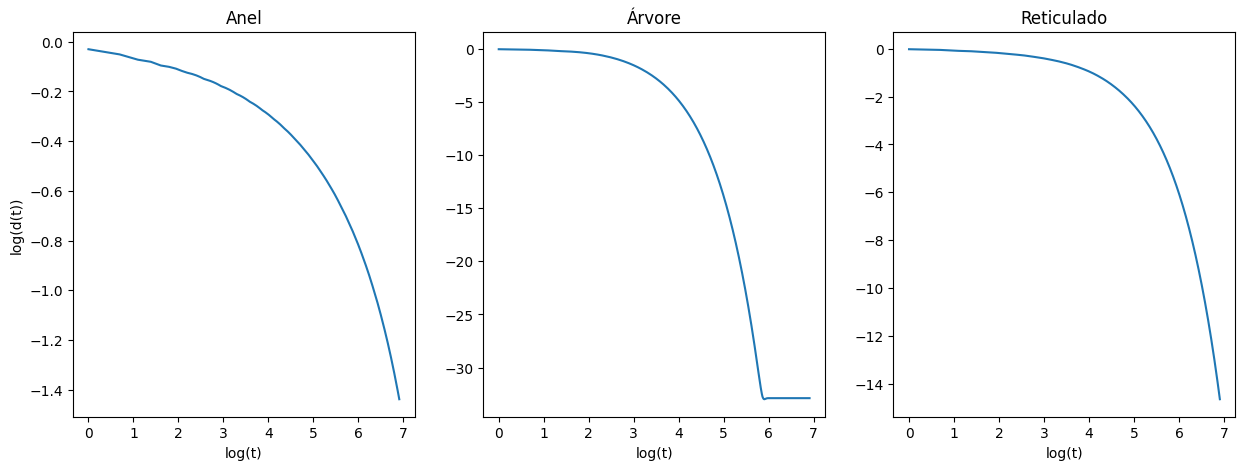

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Transformando em escala logarítmica
x = np.log(np.array(range(1, 10**3 + 1)))
y_anel = np.log(d_anel)
y_arvore = np.log(d_arvore)
y_reticulado = np.log(d_reticulado)

ax[0].set_title('Anel')
ax[0].plot(x, y_anel)
ax[0].set_xlabel('log(t)')
ax[0].set_ylabel('log(d(t))')

ax[1].set_title('Árvore')
ax[1].plot(x, y_arvore)
ax[1].set_xlabel('log(t)')


ax[2].set_title('Reticulado')
ax[2].plot(x, y_reticulado)
ax[2].set_xlabel('log(t)')

plt.show()